In [1]:
##Standards Librairies import
import os
from time import time
import warnings
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score

# Clustering Librairies import
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from yellowbrick import *

In [3]:
!pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.1.0
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.2.0
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 

sortedcontainers                   2.4.0
soupsieve                          2.2.1
Sphinx                             4.2.0
sphinxcontrib-applehelp            1.0.2
sphinxcontrib-devhelp              1.0.2
sphinxcontrib-htmlhelp             2.0.0
sphinxcontrib-jsmath               1.0.1
sphinxcontrib-qthelp               1.0.3
sphinxcontrib-serializinghtml      1.1.5
sphinxcontrib-websupport           1.2.4
spyder                             5.1.5
spyder-kernels                     2.1.3
SQLAlchemy                         1.4.22
statsmodels                        0.12.2
sympy                              1.9
tables                             3.6.1
TBB                                0.2
tblib                              1.7.0
tenacity                           8.0.1
tensorboard                        2.9.1
tensorboard-data-server            0.6.1
tensorboard-plugin-wit             1.8.1
tensorflow                         2.9.1
tensorflow-estimator               2.9.0
tensorflow-io-gcs-

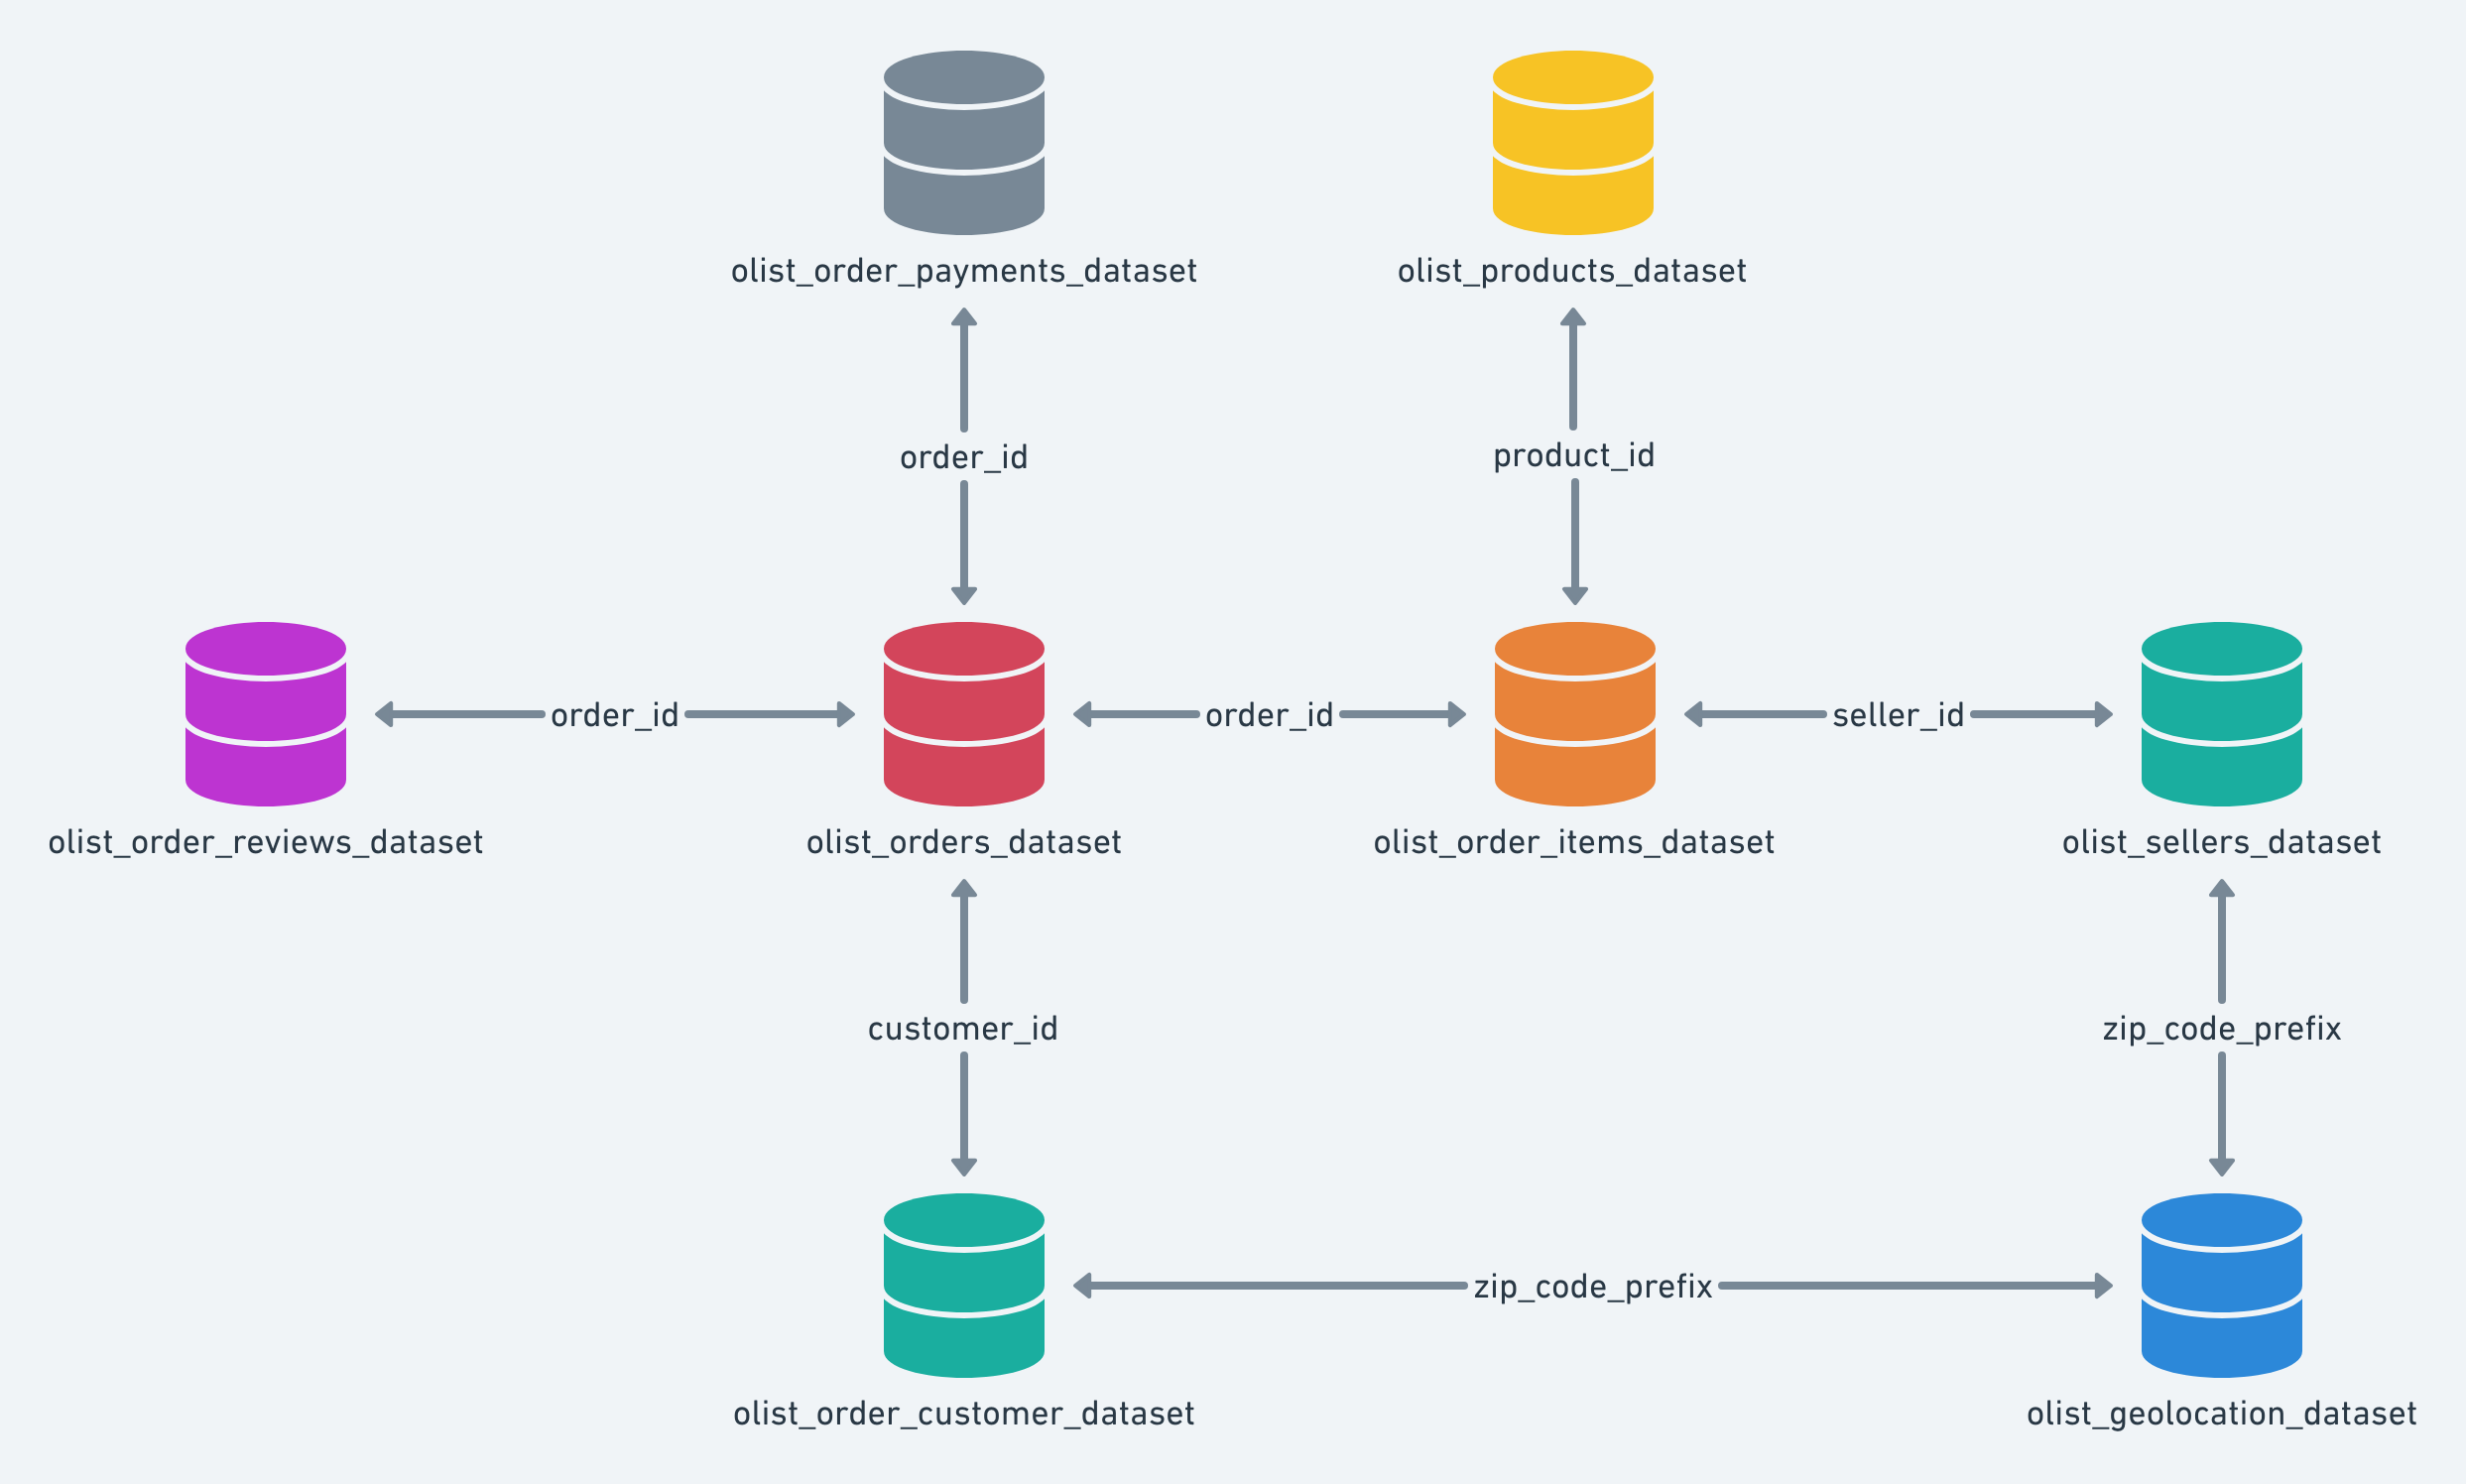

**Customers Dataset**

This dataset has information about the customer and its location. Use it to identify unique customers in the orders dataset and to find the orders delivery location.

At our system each order is assigned to a unique customerid. This means that the same customer will get different ids for different orders. The purpose of having a customerunique_id on the dataset is to allow you to identify customers that made repurchases at the store. Otherwise you would find that each order had a different customer associated with.

customer_id: key to the orders dataset. Each order has a unique customer_id.

customer_unique_id: unique identifier of a customer.

customer_zip_code_prefix: first five digits of customer zip code

customer_city: customer city name

customer_state: customer state

In [4]:
# olist_customers_dataset
customers = pd.read_csv("olist_customers_dataset.csv")
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
customers.groupby(by="customer_state").count().sort_values(by='customer_id', axis=0, ascending=False)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city
customer_state,,,,
SP,41746,41746,41746,41746
RJ,12852,12852,12852,12852
MG,11635,11635,11635,11635
RS,5466,5466,5466,5466
PR,5045,5045,5045,5045
SC,3637,3637,3637,3637
BA,3380,3380,3380,3380
DF,2140,2140,2140,2140
ES,2033,2033,2033,2033


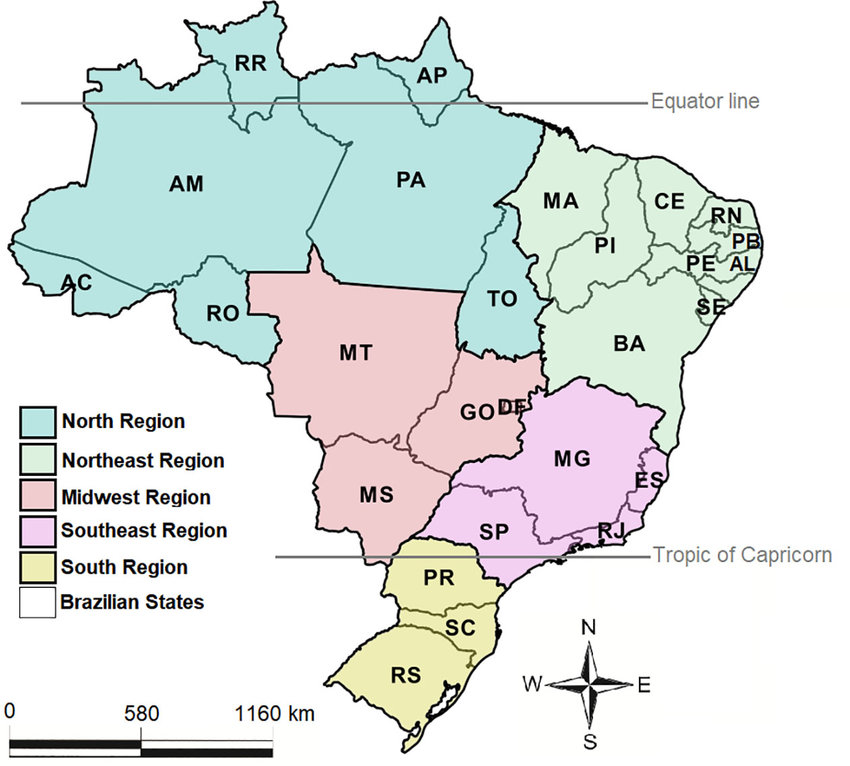

**Geolocation Dataset**

This dataset has information Brazilian zip codes and its lat/lng coordinates. Use it to plot maps and find distances between sellers and customers.

geolocation_zip_code_prefix: first 5 digits of zip code

geolocation_lat: latitude

geolocation_lng: longitude

geolocation_city: city name

geolocation_state: state

In [7]:
# olist_geolocation_dataset
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [8]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [9]:
geolocation.groupby(by="geolocation_state").count().sort_values(by='geolocation_city', axis=0, ascending=False)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city
geolocation_state,,,,
SP,404268,404268,404268,404268
MG,126336,126336,126336,126336
RJ,121169,121169,121169,121169
RS,61851,61851,61851,61851
PR,57859,57859,57859,57859
SC,38328,38328,38328,38328
BA,36045,36045,36045,36045
GO,20139,20139,20139,20139
ES,16748,16748,16748,16748


**Order Dataset**

This is the core dataset. From each order you might find all other information.

order_id: unique identifier of the order.

customer_id: key to the customer dataset. Each order has a unique customer_id.

order_status: Reference to the order status (delivered, shipped, etc).

order_purchase_timestamp: Shows the purchase timestamp.

order_approved_at: Shows the payment approval timestamp.

order_delivered_carrier_date: Shows the order posting timestamp. When it was handled to the logistic partner.

order_delivered_customer_date: Shows the actual order delivery date to the customer.

order_estimated_delivery_date: Shows the estimated delivery date that was informed to customer at the purchase moment.

In [10]:
# olist_orders_dataset
orders = pd.read_csv("olist_orders_dataset.csv")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


On remarque que les dates ne sont pas dans le bon format, on va donc convertir les valeurs

In [12]:
# Modify object cols in timestamp format
datetime_cols = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
                 "order_delivered_customer_date", "order_estimated_delivery_date"]
for col in datetime_cols:
    orders[col] = orders[col].astype('datetime64[ns]')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [13]:
orders.groupby("order_status").count()["order_id"]

order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
Name: order_id, dtype: int64

il faudra probablement se concentrer sur les commandes livrées pour ne pas fausser les résultats des ratios

**Order Items Dataset**

This dataset includes data about the items purchased within each order.

order_id order unique identifier

order_item_id sequential number identifying number of items included in the same order.

product_id product unique identifier

seller_id seller unique identifier

shipping_limit_date Shows the seller shipping limit date for handling the order over to the logistic partner.

price item price

freight_value item freight value item (if an order has more than one item the freight value is splitted between items)

In [14]:
# olist_order_items_dataset
order_items = pd.read_csv("olist_order_items_dataset.csv")
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [15]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


**Payments Dataset**

This dataset includes data about the orders payment options.

order_id: unique identifier of an order.

payment_sequential: a customer may pay an order with more than one payment method. If he does so, a sequence will be created to accommodate all payments.

payment_type: method of payment chosen by the customer.

payment_installments: number of installments chosen by the customer.

payment_value: transaction value.

In [16]:
# olist_order_payments_dataset
order_payments = pd.read_csv("olist_order_payments_dataset.csv")
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [17]:
order_payments.loc[order_payments["payment_sequential"] == 2].sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
82877,4cdbab26daf6a0dd8c5c0eb2acdd0e96,2,voucher,1,34.19
75572,da335e512c5172e253ee80cb42acf8aa,2,credit_card,3,31.05
100122,2200d7d4069cfe22127c053c75a26c17,2,voucher,1,62.20
68188,8af6d93e9fcfcf7b686b0cf6d0d84239,2,voucher,1,80.44
102341,407cc9b2c7575dbff71cb23b6cc26814,2,credit_card,7,76.39
98794,1094dc9e3237f4deff27a2bab683a300,2,credit_card,10,165.93
72677,b306e43825024d6a7727ed3bb863b650,2,voucher,1,56.40
15749,236909a5eec961f916c742c7f991d3e5,2,voucher,1,21.70
88581,d744783ed2ace06cac647a9e64dcbcfd,2,voucher,1,1.47
76127,842b6e7534c63c7956d72bb3f64bbecd,2,voucher,1,22.43


In [18]:
order_payments.loc[order_payments["order_id"] == '4bfccd93522d928f8732e455310da85b']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
7732,4bfccd93522d928f8732e455310da85b,2,voucher,1,22.43
91021,4bfccd93522d928f8732e455310da85b,1,voucher,1,20.28


In [19]:
order_payments["payment_type"].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [20]:
order_payments.loc[order_payments["payment_type"] == 'not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


In [21]:
order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


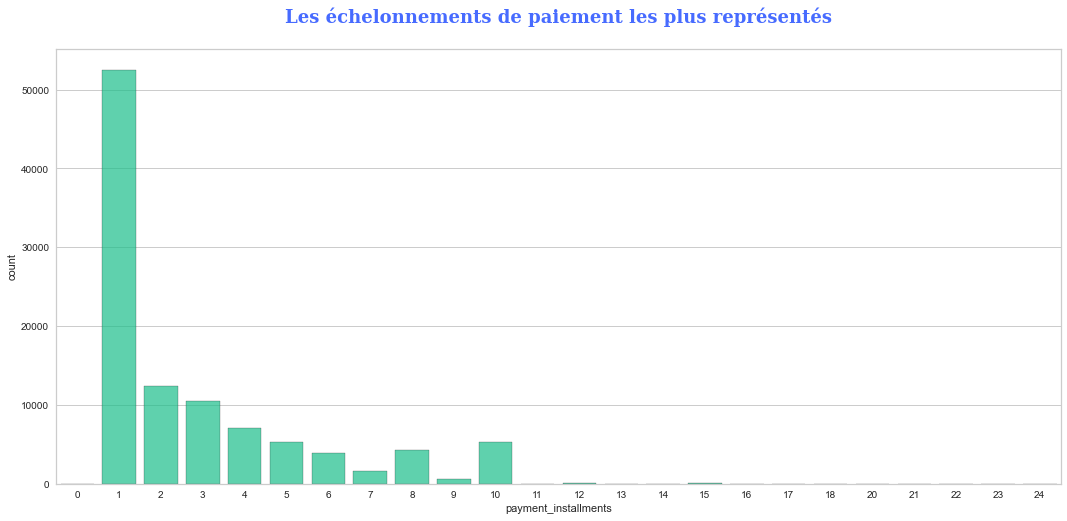

In [22]:
# Plot categories count in dataset
sns.set_style("whitegrid")
font_title = {"family": "serif",
              "color":  "#476bff",
              "weight": "bold",
              "size": 18}

fig = plt.figure(figsize=(18, 8))
sns.countplot(data=order_payments, x="payment_installments",
              edgecolor="black",
              color="#00d994", alpha=0.7)
plt.xticks()
plt.title(f"Les échelonnements de paiement les plus représentés\n",
          fontdict=font_title)
plt.show()

In [23]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


**Order Reviews Dataset**

This dataset includes data about the reviews made by the customers.

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

review_id: unique review identifier

order_id: unique order identifier

review_score: Note ranging from 1 to 5 given by the customer on a satisfaction survey.

review_comment_title: Comment title from the review left by the customer, in Portuguese.

review_comment_message: Comment message from the review left by the customer, in Portuguese.

review_creation_date: Shows the date in which the satisfaction survey was sent to the customer.

review_answer_timestamp: Shows satisfaction survey answer timestamp.

In [24]:
# olist_order_reviews_dataset
order_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [25]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


**Products Dataset**

This dataset includes data about the products sold by Olist.

product_id: unique product identifier

product_category_name: root category of product, in Portuguese.

product_name_lenght: number of characters extracted from the product name.

product_description_lenght: number of characters extracted from the product description.

product_photos_qty: number of product published photos

product_weight_g: product weight measured in grams.

product_length_cm: product length measured in centimeters.

product_height_cm: product height measured in centimeters.

product_width_cm: product width measured in centimeters.

In [26]:
# olist_products_dataset
products = pd.read_csv("olist_products_dataset.csv")
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [27]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**Category Name Translation**

Translates the productcategoryname to english.

In [28]:
# product_category_name_dataset
categories_en = pd.read_csv("product_category_name_translation.csv")
categories_en.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [29]:
categories_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


**Sellers Dataset**

This dataset includes data about the sellers that fulfilled orders made at Olist. Use it to find the seller location and to identify which seller fulfilled each product.

In [30]:
# olist_sellers_dataset
sellers = pd.read_csv("olist_sellers_dataset.csv")
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Dans un 1er temps, on n'utilisera pas ce dataset

# Jointures des datasets pour création du dataset global

In [31]:
products = pd.merge(products, categories_en,
                    how="left",
                    on="product_category_name")

In [32]:
del_features_list = ["product_category_name", "product_weight_g",
                     "product_length_cm", "product_height_cm",
                     "product_width_cm"]
products.drop(del_features_list, axis=1, inplace=True)

Dans un 1er temps, on conserve les features "product_description_lenght" et "product_photos_qty", nous essaierons de voir s'ils ont un impact sur les ventes

In [33]:
products = products.rename(columns={"product_category_name_english":
                                    "product_category_name"})
products.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,housewares


In [34]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_name_lenght         32341 non-null  float64
 2   product_description_lenght  32341 non-null  float64
 3   product_photos_qty          32341 non-null  float64
 4   product_category_name       32328 non-null  object 
dtypes: float64(3), object(2)
memory usage: 1.5+ MB


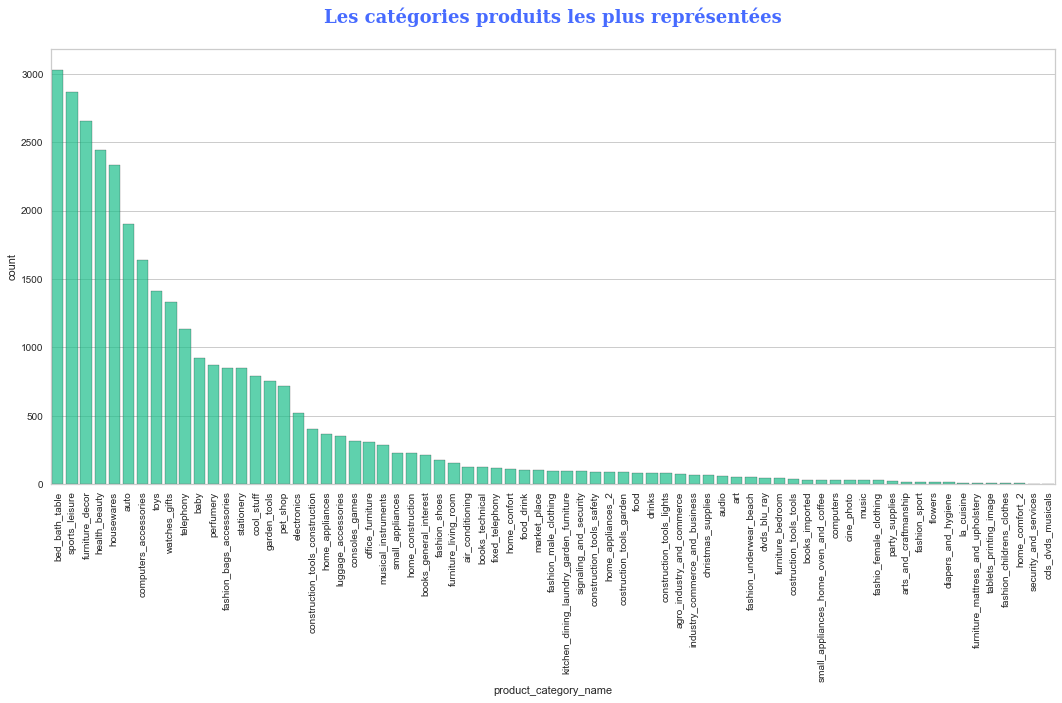

In [35]:
# Plot categories count in dataset
sns.set_style("whitegrid")
font_title = {"family": "serif",
              "color":  "#476bff",
              "weight": "bold",
              "size": 18}

fig = plt.figure(figsize=(18, 8))
sns.countplot(data=products, x="product_category_name", order = products['product_category_name'].value_counts().index,
              edgecolor="black",
              color="#00d994", alpha=0.7)
plt.xticks(rotation=90)
plt.title(f"Les catégories produits les plus représentées\n",
          fontdict=font_title)
plt.show()

In [36]:
products['product_category_name'].value_counts().iloc[:10]

bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_category_name, dtype: int64

Il y a bcp de catégories, des regroupements sont à envisager pour faciliter l'encodage, d'autant plus que de nombreuses catégories ont des volumes de commandes relativement faibles.

# Commandes

In [37]:
order_items = pd.merge(order_items, products,
                       how="left",
                       on="product_id")

order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.0,598.0,4.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,56.0,239.0,2.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,59.0,695.0,2.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,42.0,480.0,1.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,59.0,409.0,1.0,garden_tools


In [38]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    112650 non-null  object 
 1   order_item_id               112650 non-null  int64  
 2   product_id                  112650 non-null  object 
 3   seller_id                   112650 non-null  object 
 4   shipping_limit_date         112650 non-null  object 
 5   price                       112650 non-null  float64
 6   freight_value               112650 non-null  float64
 7   product_name_lenght         111047 non-null  float64
 8   product_description_lenght  111047 non-null  float64
 9   product_photos_qty          111047 non-null  float64
 10  product_category_name       111023 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 10.3+ MB


In [39]:
order_items = pd.merge(order_items, orders,
                       how="left",
                       on="order_id")

order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.0,598.0,4.0,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,56.0,239.0,2.0,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,59.0,695.0,2.0,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,42.0,480.0,1.0,perfumery,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,59.0,409.0,1.0,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [40]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  object        
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   product_name_lenght            111047 non-null  float64       
 8   product_description_lenght     111047 non-null  float64       
 9   product_photos_qty             111047 non-null  float64       
 10  product_category_name          111023 non-null  object        
 11  

In [41]:
order_items = order_items[order_items["order_status"] == "delivered"]

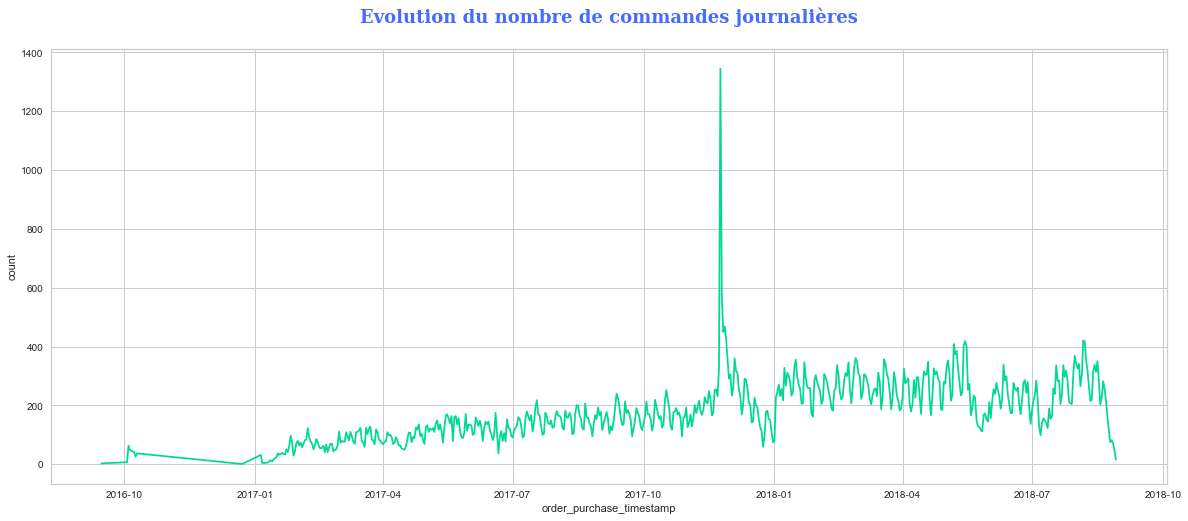

In [42]:
orders_per_days = order_items.groupby(order_items["order_purchase_timestamp"]\
                                      .astype('datetime64[ns]').dt.date)\
                                    .count()["order_id"]
fig = plt.figure(figsize=(20, 8))
ax = orders_per_days.plot(color="#00d994")
ax.set_ylabel("count")
plt.title(f"Evolution du nombre de commandes journalières\n",
          fontdict=font_title)
plt.show()

Pour étudier une eventuelle "saisonnalité"(mois)/périodicité (jour/heure) des ventes, on va se concentrer sur l'année 2017, car seule année pour laquelle les données sont complètes

In [43]:
mask = (order_items['order_purchase_timestamp'] >= '2017-01-1') & (order_items['order_purchase_timestamp'] <= '2017-12-31')
order_items_2017=order_items.loc[mask]

In [44]:
order_items_2017.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
60559,8a060d4d621f570de2264a68ad8b901c,1,82e4ad16521ca131d95e198d507db370,128639473a139ac0f3e5f5ade55873a5,2017-12-13 15:30:17,18.90,16.79,56.0,343.0,1.0,electronics,51370d844d0f837eb086ae67290a35f1,delivered,2017-12-07 13:38:29,2017-12-07 15:30:17,2017-12-11 19:44:46,2017-12-22 21:44:25,2018-01-05
103070,ea10db65e0559d69b56effcfed6a41c1,1,90f97298579cd20412fdcc9b7a2d4b6b,a3dd39f583bc80bd8c5901c95878921e,2017-12-12 02:35:46,119.90,23.16,31.0,502.0,1.0,food_drink,2c3bd36048f62f4a89633435b5e2a094,delivered,2017-12-04 08:24:13,2017-12-06 02:35:46,2017-12-06 21:48:57,2017-12-18 15:52:52,2017-12-28
89492,cb4591b9a09b86b55be10a9ea234de8c,1,ee0c1cf2fbeae95205b4aa506f1469f0,cc419e0650a3c5ba77189a1882b7556a,2017-12-01 09:31:03,53.99,17.66,44.0,334.0,1.0,perfumery,1e49d70b227359f77399581bac643bfa,delivered,2017-11-25 09:14:23,2017-11-25 09:33:12,2017-11-29 22:44:42,2017-12-28 23:26:52,2017-12-21
53948,7aad5b58b71002c5cb36db4fe822a512,1,11875b30b49585209e608f40e8082e65,669ae81880e08f269a64487cfb287169,2017-07-06 13:10:22,65.00,15.20,26.0,1465.0,1.0,sports_leisure,b56706efa54adbafc6d2ea0db33b0333,delivered,2017-06-29 13:03:01,2017-06-29 13:10:22,2017-06-30 13:30:07,2017-07-10 18:07:00,2017-07-24
67093,995c8dd1005727eb106998aab214e941,1,457cd0a99cfa977993e4eb6d98d95abb,ea8482cd71df3c1969d7b9473ff13abc,2018-01-09 04:18:23,29.99,11.85,59.0,777.0,6.0,telephony,9c8238260ea546e75c56fc27c0fedfc8,delivered,2017-12-29 13:43:15,2018-01-03 04:18:23,2018-01-05 19:20:07,2018-01-12 23:52:43,2018-01-24


Nous pouvons également regarder la répartition du nombre de commandes par mois, jour de la semaine ou heure de la journée :

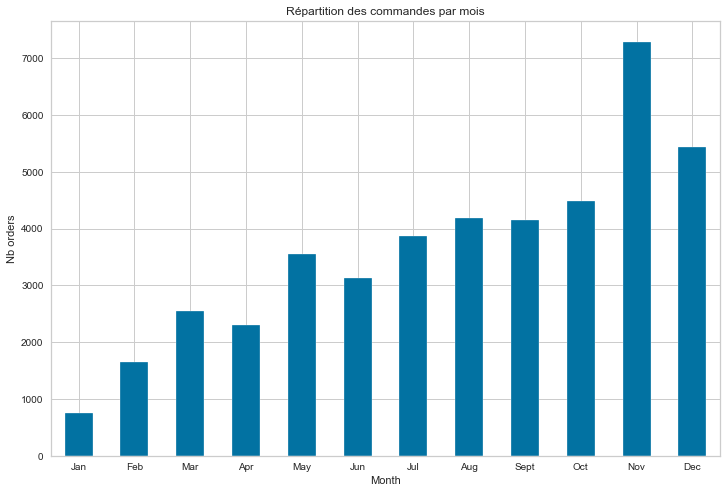

In [45]:
order_items_2017.groupby(order_items_2017['order_purchase_timestamp'].dt.month)\
    .agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar",
          title="Répartition des commandes par mois",
          ylabel="Nb orders",
          xlabel="Month",
          legend=False)
plt.xticks(np.arange(0,12), ['Jan','Feb','Mar','Apr','May','Jun',
                             'Jul','Aug','Sept','Oct','Nov','Dec'], 
           rotation='horizontal')
plt.show()

Comme vu avec le graphique précédent, on remarque que les ventes sont en augmentation régulière sur l'année avec un pic en novembre, peut-être lié à une opération de type "black friday".

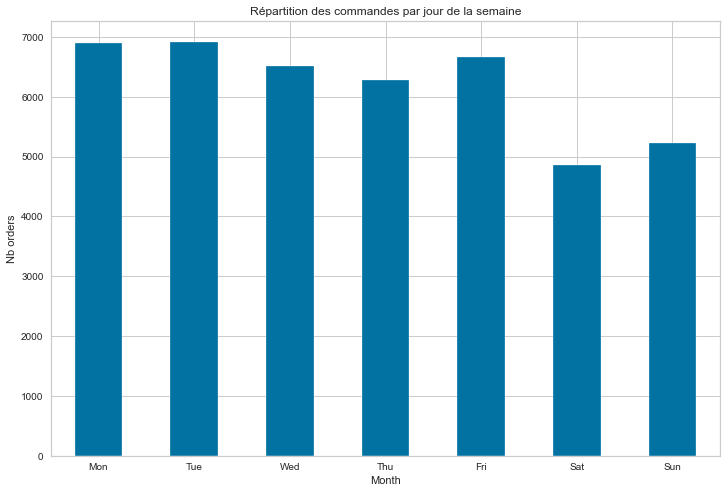

In [46]:
order_items_2017.groupby(order_items_2017['order_purchase_timestamp'].dt.dayofweek)\
    .agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar",
          title="Répartition des commandes par jour de la semaine",
          ylabel="Nb orders",
          xlabel="Month",
          legend=False)
plt.xticks(np.arange(0,7), ['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
           rotation='horizontal')
plt.show()

Les jours ouvrés de la semaine (plutôt début de semaine, lundi et mardi) semblent être les plus propices aux ventes, sans jour plus marqué significativement que les autres

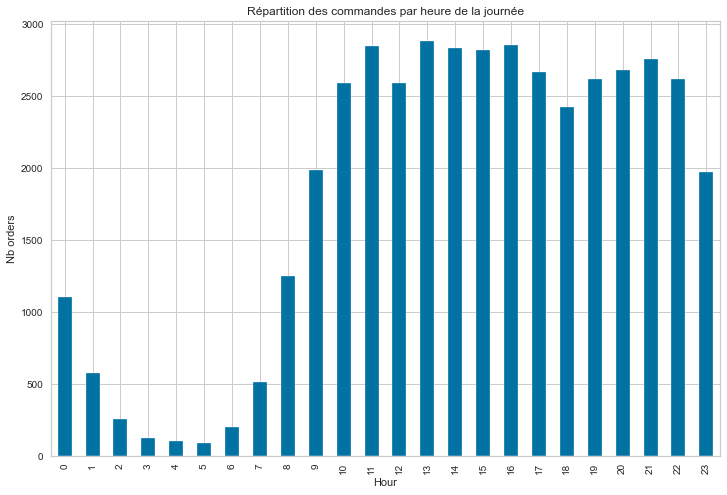

In [47]:
order_items_2017.groupby(order_items_2017['order_purchase_timestamp'].dt.hour)\
    .agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar",
          title="Répartition des commandes par heure de la journée",
          ylabel="Nb orders",
          xlabel="Hour",
          legend=False)
plt.show()

Les ventes se répartissent essentiellement sur les horaires 10-22h avec un léger reflux à 12h et 18h

{Refaire ce type de graphiques avec le chiffre d'affaires}

In [48]:
order_items_pay = pd.merge(order_items, order_payments,
                       how="left",
                       on="order_id")

In [49]:
order_items_pay.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.0,598.0,4.0,...,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,56.0,239.0,2.0,...,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,59.0,695.0,2.0,...,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,42.0,480.0,1.0,...,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,59.0,409.0,1.0,...,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,1.0,credit_card,3.0,218.04


In [50]:
order_items_pay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115038 entries, 0 to 115037
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115038 non-null  object        
 1   order_item_id                  115038 non-null  int64         
 2   product_id                     115038 non-null  object        
 3   seller_id                      115038 non-null  object        
 4   shipping_limit_date            115038 non-null  object        
 5   price                          115038 non-null  float64       
 6   freight_value                  115038 non-null  float64       
 7   product_name_lenght            113410 non-null  float64       
 8   product_description_lenght     113410 non-null  float64       
 9   product_photos_qty             113410 non-null  float64       
 10  product_category_name          113387 non-null  object        
 11  

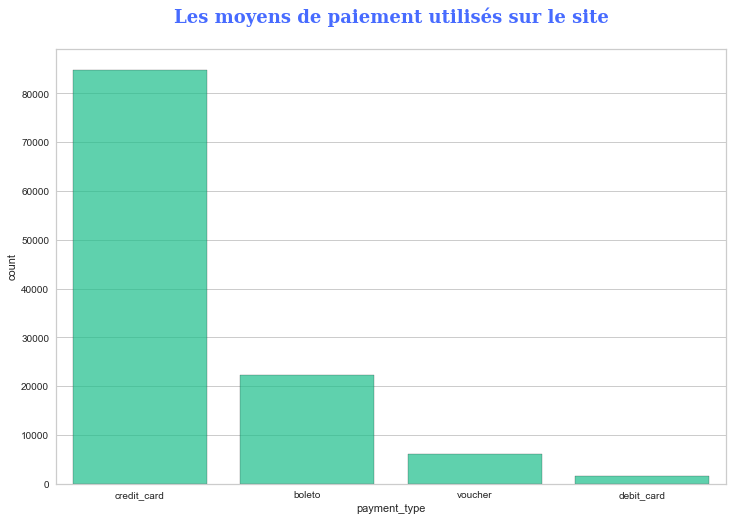

In [51]:
fig = plt.figure(figsize=(12, 8))
sns.countplot(data=order_items_pay, x="payment_type",
              edgecolor="black",
              color="#00d994", alpha=0.7)
plt.title(f"Les moyens de paiement utilisés sur le site\n",
          fontdict=font_title)
plt.show()

Environ 75% des paiements sont réalisés par 'credit_card"; suivent ensuite 2 moyens de paiement électroniques "prépayés" ('boleto' et 'voucher')

In [52]:
order_items_pay.loc[order_items_pay["order_id"] == '4bfccd93522d928f8732e455310da85b']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
34332,4bfccd93522d928f8732e455310da85b,1,d2fd481184c11c7b14fd8e62f60b86b1,1da3aeb70d7989d1e6d9b0e887f97c23,2018-01-31 12:31:23,33.99,8.72,52.0,1031.0,5.0,...,delivered,2018-01-24 12:33:58,2018-01-25 12:31:23,2018-01-26 19:16:22,2018-02-07 15:22:11,2018-02-08,2.0,voucher,1.0,22.43
34333,4bfccd93522d928f8732e455310da85b,1,d2fd481184c11c7b14fd8e62f60b86b1,1da3aeb70d7989d1e6d9b0e887f97c23,2018-01-31 12:31:23,33.99,8.72,52.0,1031.0,5.0,...,delivered,2018-01-24 12:33:58,2018-01-25 12:31:23,2018-01-26 19:16:22,2018-02-07 15:22:11,2018-02-08,1.0,voucher,1.0,20.28


In [53]:
order_items_pay_review = pd.merge(order_items_pay, order_reviews,
                       how="left",
                       on="order_id")

In [54]:
order_items_pay_review.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.0,598.0,4.0,...,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,56.0,239.0,2.0,...,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,59.0,695.0,2.0,...,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,42.0,480.0,1.0,...,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,59.0,409.0,1.0,...,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


In [55]:
order_items_pay_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115723 entries, 0 to 115722
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115723 non-null  object        
 1   order_item_id                  115723 non-null  int64         
 2   product_id                     115723 non-null  object        
 3   seller_id                      115723 non-null  object        
 4   shipping_limit_date            115723 non-null  object        
 5   price                          115723 non-null  float64       
 6   freight_value                  115723 non-null  float64       
 7   product_name_lenght            114085 non-null  float64       
 8   product_description_lenght     114085 non-null  float64       
 9   product_photos_qty             114085 non-null  float64       
 10  product_category_name          114062 non-null  object        
 11  

In [56]:
data = pd.merge(order_items_pay_review, customers,
                       how="left",
                       on="customer_id")

In [57]:
data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.0,598.0,4.0,...,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,56.0,239.0,2.0,...,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,59.0,695.0,2.0,...,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,42.0,480.0,1.0,...,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,59.0,409.0,1.0,...,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115723 entries, 0 to 115722
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115723 non-null  object        
 1   order_item_id                  115723 non-null  int64         
 2   product_id                     115723 non-null  object        
 3   seller_id                      115723 non-null  object        
 4   shipping_limit_date            115723 non-null  object        
 5   price                          115723 non-null  float64       
 6   freight_value                  115723 non-null  float64       
 7   product_name_lenght            114085 non-null  float64       
 8   product_description_lenght     114085 non-null  float64       
 9   product_photos_qty             114085 non-null  float64       
 10  product_category_name          114062 non-null  object        
 11  

In [60]:
data.to_csv("olist_dataset_global.csv", index=False)